In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import utils, optimizers
from tensorflow import lite

In [3]:
# Open the Recoleccion1 folder
os.chdir("Recoleccion2")
# Get the list of files in the folder
files = os.listdir()
#len(files)

In [4]:
alldatos =[]
rmsdatos=[]
for x in range(0,len(files)):
    csv = open(files[x], "r")
    new_list = [] # List to store the data
    try:
        new_list = [int(element) for element in csv.read().splitlines()]
    except (ValueError, TypeError):
        for element in csv.read().splitlines():
            try:
                sf = int(element)
            except (ValueError, TypeError):
                sf = 0
            finally:
                new_list.append(sf)
    finally:
        alldatos.append(new_list)
        # mean of the list
        rmsdatos.append(np.mean(new_list))
    # Close the file
    csv.close()

datosinput = np.array(alldatos)
datosrms = np.array(rmsdatos)

In [5]:
#datosinput
datosinput.shape
#datosrms
datosrms.shape

(77,)

In [6]:
allresults = []
#########
# Down                  High 
#0     H                #66.6  L
#16.6  N    #50  B      #83.3  N
#33.3  L                #100   H
#########
for x in range(0,len(files)):
    text = files[x].split("_")[1]
    if text.startswith('B'):
        allresults.append(0)
    else :
        #print(text[len(text)-2:])
        # switch case
        if text[len(text)-2:] == "UH":
            allresults.append(100)
        elif text[len(text)-2:] == "UN":
            allresults.append(83.3)
        elif text[len(text)-2:] == "UL":
            allresults.append(66.6)
        elif text[len(text)-2:] == "DL":
            allresults.append(33.3)
        elif text[len(text)-2:] == "DN":
            allresults.append(16.6)
        elif text[len(text)-2:] == "DH":
            allresults.append(0)
datosoutput = np.array(allresults)


In [7]:
#datosoutput
datosoutput.shape

(77,)

In [8]:
# datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(datosinput, datosoutput, test_size=0.2)
x_train_rms, x_test_rms, y_train_rms, y_test_rms = train_test_split(datosrms, datosoutput, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train_rms.shape)
print(x_test_rms.shape)
print(y_train_rms.shape)
print(y_test_rms.shape)


(61, 500)
(16, 500)
(61,)
(16,)
(61,)
(16,)
(61,)
(16,)


In [12]:
#x_train
#y_train
#x_test
#y_test
#x_train_rms
#y_train_rms
#x_test_rms
#y_test_rms


array([1607.138, 1763.022, 1819.942, 1665.058, 1820.336, 1607.796,
       1608.526, 1611.828, 1771.116, 1743.032, 1665.354, 1614.142,
       1749.392, 1758.744, 1815.486, 1609.62 , 1666.74 , 1822.756,
       1605.786, 1665.428, 1607.452, 1737.714, 1611.384, 1666.292,
       1668.152, 1607.76 , 1780.122, 1612.124, 1752.508, 1613.564,
       1665.64 , 1664.38 , 1751.222, 1611.136, 1791.768, 1665.244,
       1668.978, 1813.602, 1606.712, 1825.522, 1606.006, 1666.296,
       1807.742, 1751.168, 1665.284, 1744.334, 1608.83 , 1722.754,
       1667.784, 1665.462, 1610.09 , 1761.558, 1612.572, 1822.444,
       1608.186, 1693.478, 1670.788, 1755.46 , 1610.572, 1608.692,
       1609.48 ])

In [17]:
# define the model architecture all data
inputlayer = tf.keras.layers.Dense(units=1, input_shape=(x_train.shape[1],), activation='relu')
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta = tf.keras.layers.Dense(units=7, activation='softmax')
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([inputlayer, oculta, salida])

In [18]:
# define the model rms
inputlayer_rms = tf.keras.layers.Dense(units=1, input_shape=[1], activation='relu')
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta_rms = tf.keras.layers.Dense(units=7, activation='softmax')
salida_rms = tf.keras.layers.Dense(units=1)
modelo_rms = tf.keras.Sequential([inputlayer_rms, oculta_rms, salida_rms])

In [19]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_rms.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
print("Comenzando entrenamiento...")
historial = modelo.fit(x_train, y_train, epochs=1000,verbose=1 )#
print("Modelo entrenado!")


Comenzando entrenamiento...
Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.8495e-06 - accuracy: 0.0000e+00
Epoch 10/1000
2/2 

In [21]:

print("Comenzando entrenamiento de rms...")
historial_rms = modelo_rms.fit(x_train_rms, y_train_rms, epochs=1000,verbose=1 )#
print("Modelo entrenado!")

Comenzando entrenamiento de rms...
Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 7/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.9476e-06 - accuracy: 0.3443
Epoch 10/1000
2/2 [============================

In [23]:

test_results = modelo.evaluate(x_test, y_test, verbose=1)
test_results
test_results_rms = modelo_rms.evaluate(x_test_rms, y_test_rms, verbose=1)
test_results_rms

1/1 [==============================] - 0s 18ms/step - loss: 5.7079e-06 - accuracy: 0.0625


[5.707890522899106e-06, 0.0625]

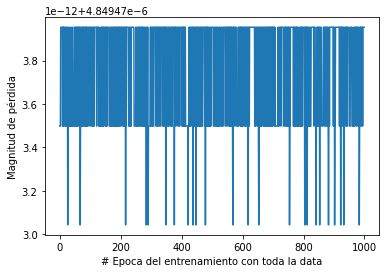

In [24]:

plt.xlabel("# Epoca del entrenamiento con toda la data")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


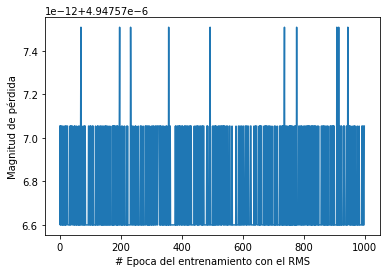

In [25]:

plt.xlabel("# Epoca del entrenamiento con el RMS")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_rms.history['loss'])

In [26]:
print("Variables internas del modelo con toda la data")
print(inputlayer.get_weights())
print(oculta.get_weights())
print(salida.get_weights())

print("Variables internas del modelo con el RMS")
print(inputlayer_rms.get_weights())
print(oculta_rms.get_weights())
print(salida_rms.get_weights())



Variables internas del modelo con toda la data
[array([[-0.06694098],
       [-0.04614924],
       [-0.01059281],
       [-0.04921049],
       [-0.06181252],
       [ 0.07856638],
       [ 0.10642468],
       [ 0.05960085],
       [-0.06270171],
       [ 0.09223752],
       [-0.0097295 ],
       [ 0.00098041],
       [-0.02199855],
       [ 0.06189128],
       [ 0.10899708],
       [ 0.06084833],
       [-0.09623425],
       [-0.09638945],
       [-0.08738492],
       [-0.08974982],
       [-0.02651175],
       [ 0.0645465 ],
       [-0.09463225],
       [ 0.05755135],
       [-0.08393046],
       [ 0.05853813],
       [-0.08258954],
       [ 0.07271258],
       [ 0.07340314],
       [ 0.01175067],
       [ 0.10591828],
       [ 0.1091124 ],
       [ 0.00386747],
       [-0.00266834],
       [-0.00202125],
       [ 0.0831475 ],
       [ 0.06546889],
       [-0.01651458],
       [ 0.09161126],
       [ 0.03847107],
       [-0.00173891],
       [ 0.0305597 ],
       [-0.05340882],
      